# Problem
## Part 1
The position of an object moving in a straight line is given by,
$$x = 3t - 4t^2 + t^3$$
where $t$ is in seconds and $x$ is in meters

a)  What is the position of the object at $t = $1, 2, 3 and 4 $s$?<br>
b)  What is the object's displacement between $t = 0$ and $t = 4$ seconds?<br>
c)  What is the average velocity of the object between $t = 2$ and $t = 4s$?

##  Part 2
Next, we’ll look at a similar problem, but this time, we have a set of sampled data (based on the original position equation) that might mimic real-world sensor data.  We are then going to answer the same questions as in the first part.  See the figure below for the data set we'll be using.
![alt text](sampled_data.png "Title")

In [3]:
#  Import needed packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

%matplotlib inline


In [4]:
#  Define needed functions

#  This function is for the position of the object as noted in the problem statement above
def position(t):
    return 3 * t - 4 *  np.power(t, 2) + np.power(t, 3)

#  Exact velocity manually taking the first derivative
def exact_derivative(t):
    return 3 - 8 * t + 3 * np.power(t, 2)

#  Numerical estimation of the derivative using a central difference formula
def derivative(t):
    epsilon = 1e-8
    return( (position(t + epsilon) - position(t - epsilon)) / (2 * epsilon))

In [5]:
#  Part a

#  Print out the positions at the requested times
print('Position = ', position(1))
print('Position = ', position(2))
print('Position = ', position(3))
print('Position = ', position(4))

# Part b
#  Print the displacement between t = 0 and t = 4 seconds.
print('Displacement = ', position(4) - position(0))

Position =  0
Position =  -2
Position =  0
Position =  12
Displacement =  12


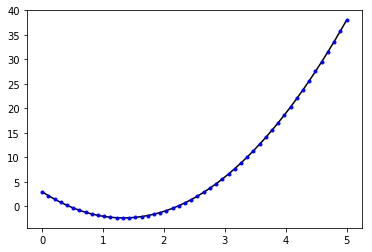

In [6]:
#  Plot the exact and numerical approx of the derivative

# The function linspace creates a series of linearly distributed points.  We the calculate the exact derivative and its approximation
t = np.linspace(0, 5)
v_exact = exact_derivative(t)
v = derivative(t)

#  Overlay the two to see how well our approximation works
plt.plot(t, v_exact, 'k')
plt.plot(t, v, 'b.')

## Average Velocty
$$\bar{V} = \int_{t_1}^{t_2} \frac{v(t)}{t_2 - t_1} dt$$

Numpy has a built-in function *trapz* which estimates an integral via the trapezoidal rule.

In [7]:
# Part C
t_int = np.linspace(2, 4)
v_int = derivative(t_int)

print('Average velocity = ', np.trapz(v_int, t_int) / 2.0)

Average velocity =  7.0008329741065625


In [8]:
# Part 2

#  Create a bunch of randomly sampled floats between 0 and 5 to use for our sampled time values
#  The we calculate the positions at those times
np.random.seed(1)
t_sampled = 5 * np.random.rand(100)
t_sampled = np.sort(t_sampled)
x_sampled = position(t_sampled)

#  Create spline object
cs = CubicSpline(t_sampled, x_sampled)
t_int = np.linspace(0, 5)
x_int = cs(t_int)

# Part a
print('Position at t = 1:  ', cs(1))
print('Position at t = 2:  ', cs(2))
print('Position at t = 3:  ', cs(3))
print('Position at t = 4:  ', cs(4))

# Part b
print('Displacement = ', cs(4) - cs(0))

# Part c
#  The spline function can return its derivative
V_cs = cs.derivative()

print('Average velocity = ', np.trapz( V_cs(np.linspace(2,4)), np.linspace(2,4)) / 2.0)

#  Just plot the sampled positions and times
#plt.plot(t_sampled, x_sampled, '.')
#plt.plot(t_int, x_int, 'k')

Position at t = 1:   2.968617546065828e-17
Position at t = 2:   -2.0000000000000036
Position at t = 3:   -1.0993322138025396e-14
Position at t = 4:   11.999999999999986
Displacement =  11.999999999999986
Average velocity =  7.000832986255923
